https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
X = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/CC GENERAL.csv')
X

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)
 
# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)
 
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Preprocessing the data to make it visualizable
 
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Normalizing the Data
X_normalized = normalize(X_scaled)
 
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
 
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
 
X_principal.head()

,P1,P2
0,-0.489949,-0.679975
1,-0.519098,0.544835
2,0.330634,0.268885
3,-0.481656,-0.097608
4,-0.563512,-0.482506


In [5]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')

In [6]:
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

In [7]:
labels_rbf 

array([0, 0, 1, ..., 1, 0, 0])

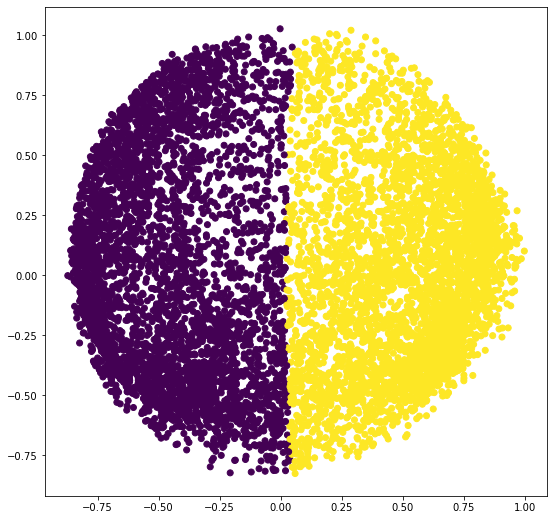

In [8]:
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = labels_rbf)
#plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [9]:
# Building the clustering model
spectral_model_rbf_4 = SpectralClustering(n_clusters = 4, affinity ='rbf')

In [11]:
# Training the model and Storing the predicted cluster labels
labels_rbf_4 = spectral_model_rbf_4.fit_predict(X_principal)

In [12]:
labels_rbf_4

array([1, 2, 3, ..., 0, 1, 0])

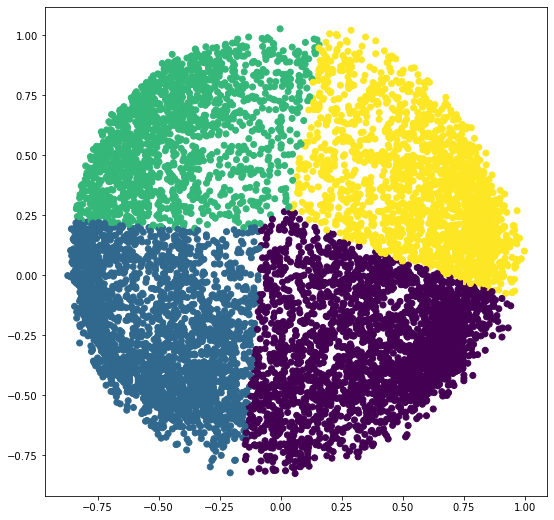

In [13]:
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = labels_rbf_4)
#plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

# affinity = ‘nearest_neighbors’ 

In [14]:

# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
 
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [15]:
# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']
 
# List of Silhouette Scores
s_scores = []
 
# Evaluating the performance
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))
 
print(s_scores)

[0.05300611480757429, 0.05667039590382261]


# affinity = ‘nearest_neighbors’ gives a better score. 

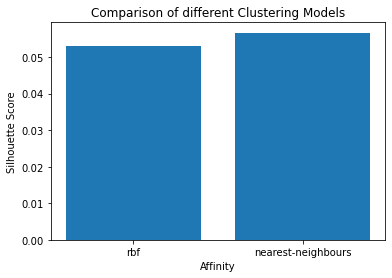

In [16]:
# Plotting a Bar Graph to compare the models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

In [18]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random

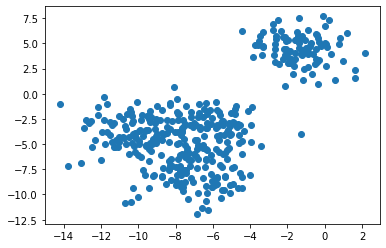

In [19]:
random.seed(1)
x, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5)
 
plt.scatter(x[:,0], x[:,1])
plt.show()

The SpectralClustering requires the number of clusters so w'll set 4 to n_cluster parameter. 

In [21]:
sc = SpectralClustering(n_clusters=4).fit(x)
print(sc)

SpectralClustering(n_clusters=4)


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


default values: 

SSpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None) 

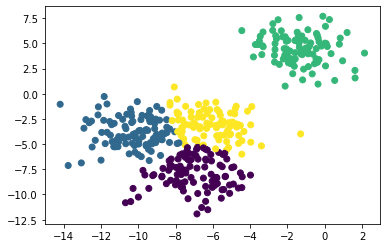

In [23]:
labels = sc.labels_

plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()  

We can also check the clustering the result by changing the number of clusters.

In [25]:
from matplotlib.pyplot import figure

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have

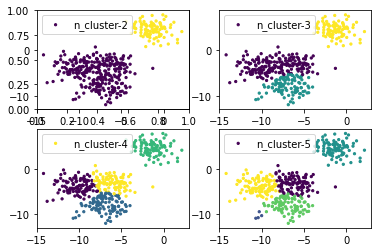

<Figure size 8000x8000 with 0 Axes>

In [30]:
f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(2, 6):
 sc = SpectralClustering(n_clusters=i).fit(x)
 f.add_subplot(2, 2, i-1)
 plt.scatter(x[:,0], x[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
 plt.legend()
figure(figsize=(100, 100), dpi=80)
plt.show() 

In [31]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

In [32]:
# create the datase
x, y = make_circles(n_samples=1000, factor=0.5, noise=0.06)

In [33]:
# normalization of the values
x = StandardScaler().fit_transform(x)

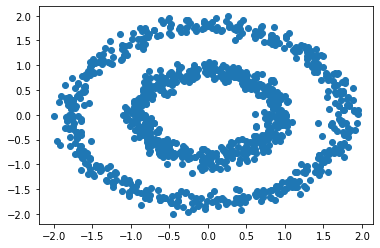

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1])
plt.show()

If we used the kMeans algorithm on this data, it would not segregate the clusters in the way we want. Let’s look at the clusters formed with kMeans, then we will compare it with Spectral Clustering.

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


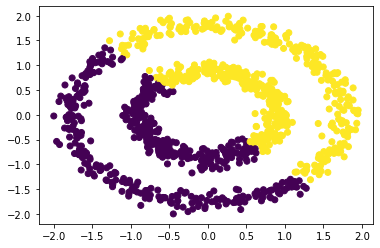

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(x)
y2 = kmeans.predict(x)

# plot
plt.scatter(x[:, 0], x[:, 1], c=y2)
plt.show()

Now let’s apply the Spectral Clustering algorithm to the above data points: 

In [37]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit(x)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Let’s visualize how the points are classified in the clusters:

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


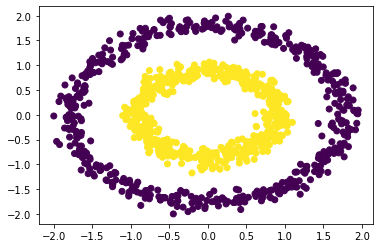

In [38]:
y2 = model.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y2)
plt.show()

# We can see that the algorithm has identified the clusters.

# Play with gamma to optimize the clustering results
kmns = SpectralClustering(n_clusters=2,  gamma=0.5, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=-1)